# Homework Answer

* Họ và tên: Nguyễn Vạn Phúc Huy 
* MSSV: 23110163

1. Tasks
    * Choose any image from the Internet and perform the following operations:
    * Write a function to provide basic information about the image:
      * Determine whether the image is color (RGB) or grayscale.
      * Print the minimum and maximum pixel values for each channel.
    * Bit-plane slicing (one bit-plane per channel):
      * Display 1 bit-plane image for each of the R, G, B channels (3 images in total).
      * Display 1 bit-plane image for each of the H, S, V channels (3 images in total).
    * Display histograms of the RGB channels and the HSV channels.
    * Enhancement using thresholds on the Value channel (V in HSV):
      * Choose a low threshold and a high threshold.
      * For pixels below the low threshold → make them darker.
      * For pixels above the high threshold → make them brighter.

2. Short Report
    * Present the original image and all transformed images.
    * Write a short caption/description for each step

## 1. Tasks

Import Libs

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt    
from pylab import imread

Getting image

In [27]:
newImg = imread('minecraft.png')
# print image size (y,x, kênh màu)
print("Image size:", newImg.shape)
# print image data type 
print("Image data type:", newImg.dtype)
# print img vector
print("Image array:\n", newImg.shape)

# convert to gray
newImg_grayified = cv2.cvtColor(newImg, cv2.COLOR_BGR2GRAY)

Image size: (1057, 1920, 4)
Image data type: float32
Image array:
 (1057, 1920, 4)


Function to check if image is gray or RGB

In [28]:
def isGrayOrRGBImage(img):
    if len(img.shape) < 3: # gray image is 2-d vector
        return 1, "gray image"
    else:
        return 0, "RGB image"
#test
print("newImg - is:", isGrayOrRGBImage(newImg)[1])
print("newImg_grayified - is:", isGrayOrRGBImage(newImg_grayified)[1])

newImg - is: RGB image
newImg_grayified - is: gray image


Function to get min and max pixel values for each channel

In [29]:
# output will be min[r,g,b] and max[r,g,b] for RGB image, [min, max] for gray image
def getMinMaxPixelValues(img):
    if isGrayOrRGBImage(img)[0] == 1: # gray image
        min_val = np.min(img)
        max_val = np.max(img)
        return (min_val, max_val)
    elif isGrayOrRGBImage(img)[0] == 0: # RGB image
        min_vals = []
        max_vals = []
        for i in range(img.shape[2] - 1): # for each channel
            min_vals.append(np.min(img[:, :, i]))
            max_vals.append(np.max(img[:, :, i]))
        return (min_vals, max_vals)
    
#test
print("OG Image min/max pixel values:", getMinMaxPixelValues(newImg))
print("Grayified Image min/max pixel values:", getMinMaxPixelValues(newImg_grayified))

OG Image min/max pixel values: ([np.float32(0.023529412), np.float32(0.015686275), np.float32(0.015686275)], [np.float32(1.0), np.float32(1.0), np.float32(1.0)])
Grayified Image min/max pixel values: (np.float32(0.016580394), np.float32(1.0))


Display 1 bit-plane image for each of the R, G, B channels (3 images in total)

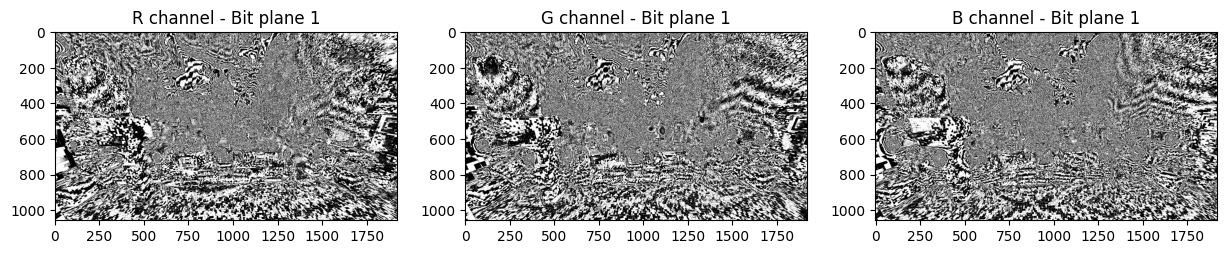

In [30]:
# create newImg in uint8
newImg_uint8 = (newImg * 255).astype(np.uint8)
# Slicing
BIT_PLANE_VALUE = 2  # 1, 2, 4, 8, 16, 32, 64, 128 (level 0-7)
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE)) # get bit level instead manual cuz lazy

r_channel = newImg_uint8[:, :, 2]
g_channel = newImg_uint8[:, :, 1]
b_channel = newImg_uint8[:, :, 0]

# Convert img to bit-plane images
bit_plane_r = cv2.bitwise_and(r_channel, BIT_PLANE_VALUE)
bit_plane_g = cv2.bitwise_and(g_channel, BIT_PLANE_VALUE)
bit_plane_b = cv2.bitwise_and(b_channel, BIT_PLANE_VALUE)
# plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(bit_plane_r, cmap='gray')
plt.title(f"R channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_g, cmap='gray')
plt.title(f"G channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_b, cmap='gray')
plt.title(f"B channel - Bit plane {BIT_INDEX}")
plt.show()


Display 1 bit-plane image for each of the H, S, V channels (3 images in total).

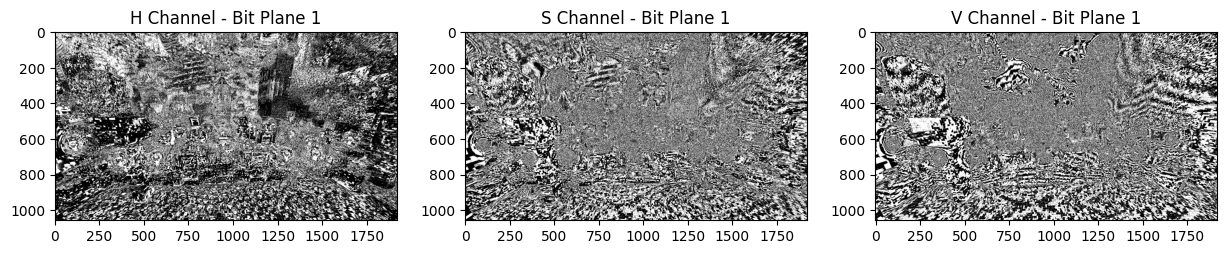

In [31]:
# Convert RGB to HSV
hsvImg = cv2.cvtColor(newImg_uint8, cv2.COLOR_BGR2HSV)

# Slicing
BIT_PLANE_VALUE = 2
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE)) # get bit level instead manual cuz lazy

h_hsvImg = hsvImg[:, :, 0]
s_hsvImg = hsvImg[:, :, 1]
v_hsvImg = hsvImg[:, :, 2]

# Convert img to bit-plane images
bit_plane_H = cv2.bitwise_and(hsvImg[:, :, 0], BIT_PLANE_VALUE)
bit_plane_S = cv2.bitwise_and(hsvImg[:, :, 1], BIT_PLANE_VALUE)
bit_plane_V = cv2.bitwise_and(hsvImg[:, :, 2], BIT_PLANE_VALUE)

# plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(bit_plane_H, cmap='gray')
plt.title(f"H Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_S, cmap='gray')
plt.title(f"S Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_V, cmap='gray')
plt.title(f"V Channel - Bit Plane {BIT_INDEX}")
plt.show()

Display histograms of the RGB channels and the HSV channels

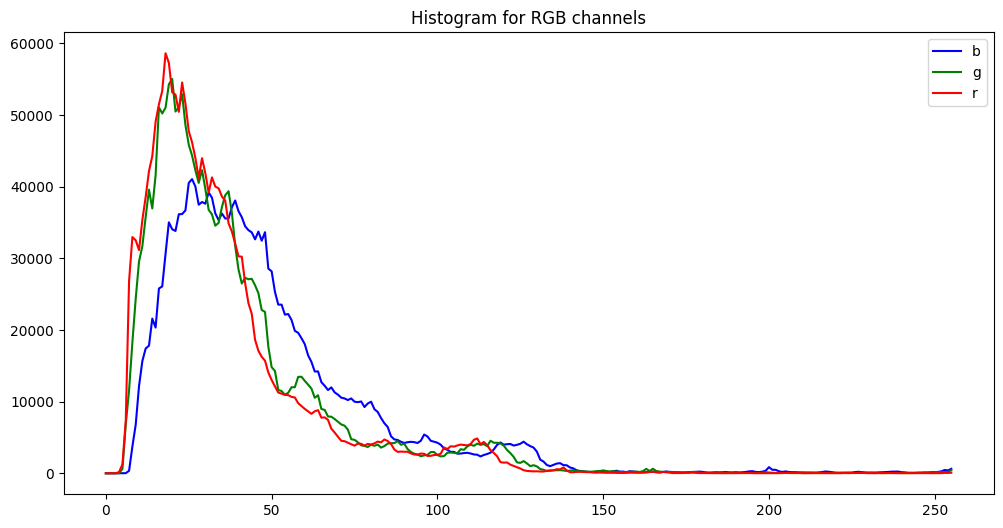

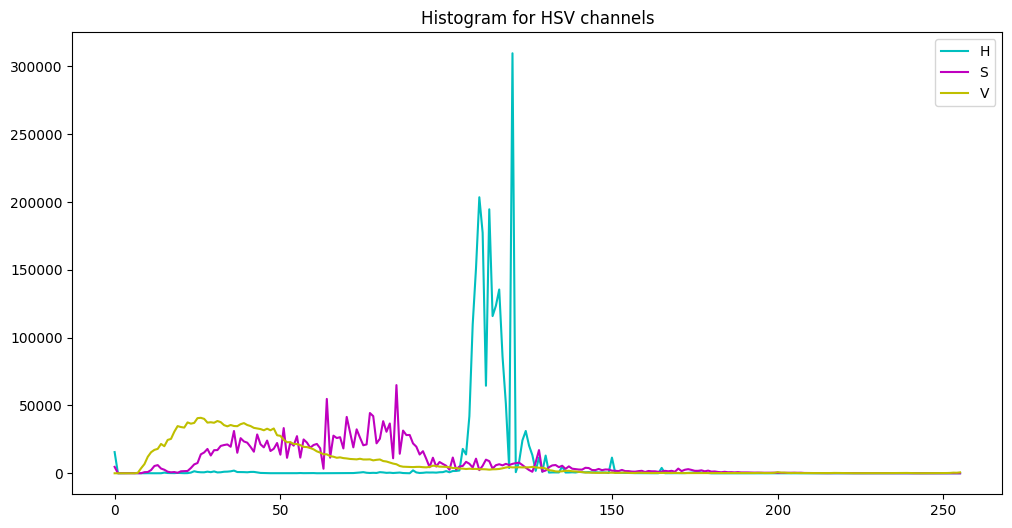

In [32]:
#Display histograms of the RGB channels and the HSV channels.
# RGB
color = ('b','g','r')
plt.figure(figsize=(12, 6))
for i, col in enumerate(color):
    histr = cv2.calcHist([newImg_uint8], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.legend(color)
plt.title("Histogram for RGB channels")
plt.show()
# HSV - Corrected Legend
color = ('c','m','y')
names = ('H', 'S', 'V')
plt.figure(figsize=(12, 6))
lines = [] 
for i, col in enumerate(color):
    histr = cv2.calcHist([hsvImg], [i], None, [256], [0, 256])
    line, = plt.plot(histr, color=col)
    lines.append(line)

plt.legend(lines, names)
plt.title("Histogram for HSV channels")
plt.show()

 Enhancement using thresholds on the Value channel (V in HSV)
* Choose a low threshold and a high threshold.
* For pixels below the low threshold → make them darker.
* For pixels above the high threshold → make them brighter.

In [33]:
#Choose a low threshold and a high threshold
low_threshold = 50 # 50/255 -> 20% brightness
high_threshold = 200  #200/255 -> 80% brightness

new_hsvImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2HSV)
# Getting h, s, v 
h, s, v = cv2.split(new_hsvImg)

In [34]:
#For pixels below the low threshold → make them darker (50% more)
v_low = v.copy().astype(np.float32)
# get pixels lower than threshold
pixels_low = v_low < low_threshold
v_low[pixels_low] = v_low[pixels_low] * 0.5

In [35]:
#For pixels above the high threshold → make them brighter (50% more)
v_high = v.copy().astype(np.float32)
# get pixels higher than threshold
pixels_high = v_high > high_threshold
v_high[pixels_high] = v_high[pixels_high] * 1.5

In [36]:
# Convert image back to BGR after enchancement for display images in short report later
# Merge back the channels
enhanced_hsvImg_high = cv2.merge([h, s, v_high])
enhanced_hsvImg_low = cv2.merge([h, s, v_low])
# Convert back to BGR
enhanced_bgrImg_high = cv2.cvtColor(enhanced_hsvImg_high, cv2.COLOR_HSV2BGR)
enhanced_bgrImg_low = cv2.cvtColor(enhanced_hsvImg_low, cv2.COLOR_HSV2BGR)

## 2. Short report

### 2.1. Present the original image and all transformed images.

#### 2.1.1. Original Image/ Grayified Image

Text(0.5, 1.0, 'Grayified Image')

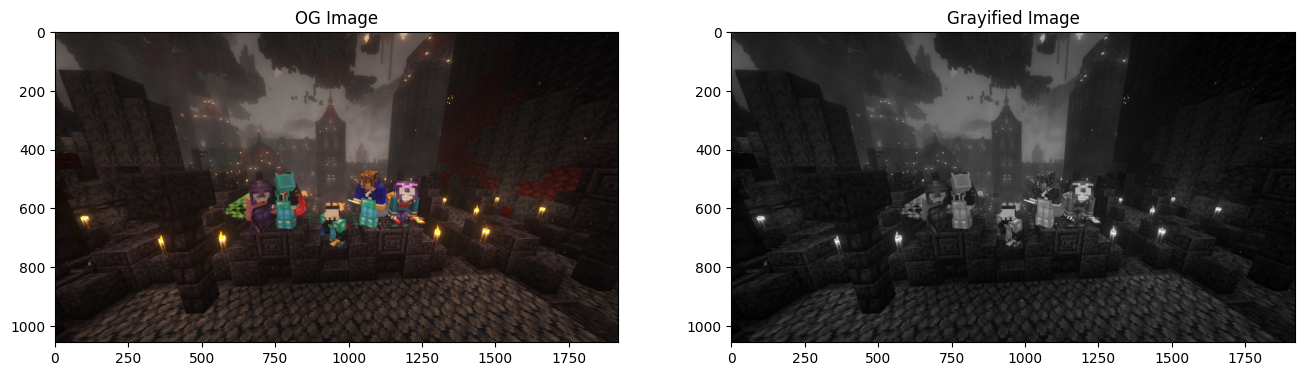

In [37]:
# print images
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.imshow(newImg)
plt.title("OG Image")


plt.subplot(1, 2, 2)
plt.imshow(newImg_grayified, cmap='gray')
plt.title("Grayified Image")

#### 2.1.2. Bit-plane Slicing Images

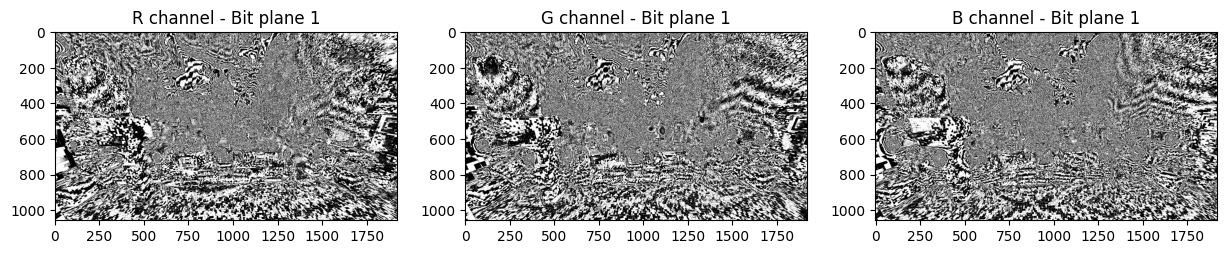

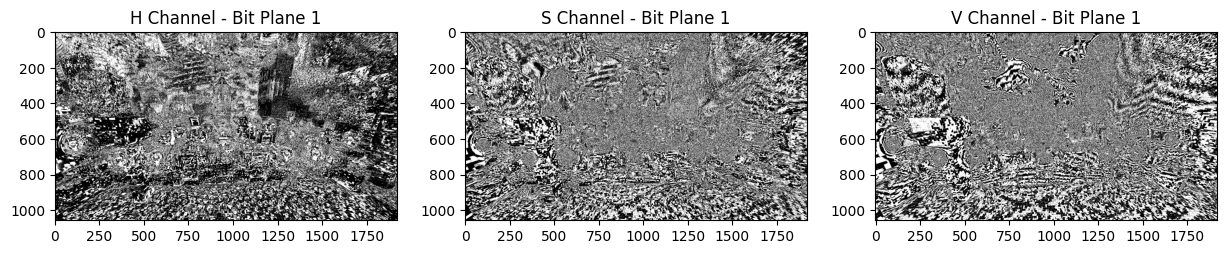

In [38]:
# RGB
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(bit_plane_r, cmap='gray')
plt.title(f"R channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_g, cmap='gray')
plt.title(f"G channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_b, cmap='gray')
plt.title(f"B channel - Bit plane {BIT_INDEX}")
plt.show() 

# HSV
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(bit_plane_H, cmap='gray')
plt.title(f"H Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_S, cmap='gray')
plt.title(f"S Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_V, cmap='gray')
plt.title(f"V Channel - Bit Plane {BIT_INDEX}")
plt.show()

#### 2.1.4 Enhanced RGB images after enhancement using thresholds on the Value channel 

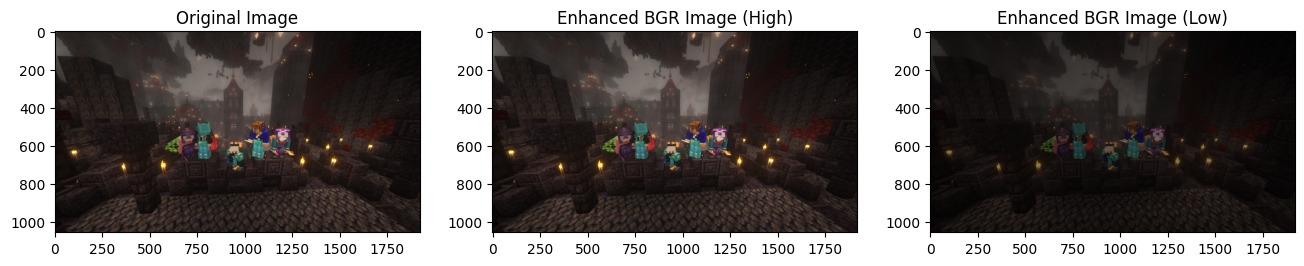

In [39]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.imshow(newImg)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(enhanced_bgrImg_high)
plt.title("Enhanced BGR Image (High)")
plt.subplot(1, 3, 3)
plt.imshow(enhanced_bgrImg_low)
plt.title("Enhanced BGR Image (Low)")
plt.show()

### 2.2. Write a short caption/description for each step

#### 2.2.1. Function to determine whether the image is color (RGB) or grayscale

def isGrayOrRGBImage(img) với input là ảnh và output sẽ là kết quả là ảnh gray (true) hay rgb (false)
* Do ảnh grayscaled thì sẽ có vector 2 thành phần (chỉ có height,width) nên ta sẽ kiểm tra chiều của ảnh được lấy qua img.shape: if len(img.shape) < 3 
    * Nếu thoả thì ảnh là grayscaled, trả về: 1, "gray image" 
    * Nếu không thì ảnh là rgb, trả về: 0, "RGB image"

#### 2.2.2. Function to print the minimum and maximum pixel values for each channels

def isGrayOrRGBImage(img) với input là ảnh và output sẽ là vector chứa min,max pixels 
* Ảnh grayscaled là vector có 2 thành phần, còn ảnh RGB có 3 thành phần nên ta chia 2 trường hợp: 
    * Nếu là ảnh grayscaled thì ta lấy luôn giá trị pixel lớn nhất và nhỏ nhất và trả về: 
    vector 2 thành phần(min_val, max_val)

    * Nếu là ảnh RGB thì ta xét từng channel r,g,b (0->2) và bỏ channel 3 vì đó là alpha channel. Khi đó ta thêm các phần tử min và max lần lượt của r,g,b vào min_vals, max_vals và tổng hợp lại trả về: 
    vector 6 thành phần (với 3 thành phần đầu là min(r,g,b) và 3 thành phần cuối là max(r,g,b))

#### 2.2.3. Display 1 bit-plane image for each of the R, G, B channels (3 images in total)

- B1: Chuyển ảnh dưới dạng uint8 để thực hiện bit-plane slicing 

In [40]:
newImg_uint8 = (newImg * 255).astype(np.uint8)

- B2: Thực hiện bit-plane slicing 

In [41]:
#Chọn bit plane bậc 1:
BIT_PLANE_VALUE = 2 

#Lấy bậc của bit plane:
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE))

#Lấy ảnh kênh r,g,b của ảnh dưới dạng uint8:
r_channel = newImg_uint8[:, :, 2]
g_channel = newImg_uint8[:, :, 1]
b_channel = newImg_uint8[:, :, 0]

#Thực hiện bit-plane slicing vào ảnh kênh r,g,b
bit_plane_r = cv2.bitwise_and(r_channel, BIT_PLANE_VALUE)
bit_plane_g = cv2.bitwise_and(g_channel, BIT_PLANE_VALUE)
bit_plane_b = cv2.bitwise_and(b_channel, BIT_PLANE_VALUE)

- B3: Vẽ ảnh

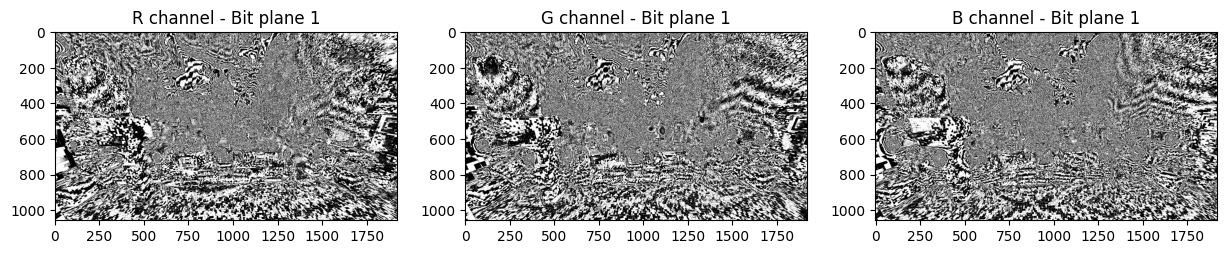

In [42]:
#Giống Matlab
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(bit_plane_r, cmap='gray')
plt.title(f"R channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_g, cmap='gray')
plt.title(f"G channel - Bit plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_b, cmap='gray')
plt.title(f"B channel - Bit plane {BIT_INDEX}")
plt.show()

#### 2.2.4. Display 1 bit-plane image for each of the H, S, V channels (3 images in total)

- B1: Chuyển ảnh sang dạng uint8 và từ RGB thành HSV

In [43]:
hsvImg = cv2.cvtColor(newImg_uint8, cv2.COLOR_BGR2HSV)

- B2: Thực hiện bit-plane slicing 

In [44]:
#Chọn bit plane bậc 1:
BIT_PLANE_VALUE = 2

#Lấy bậc của bit plane:
BIT_INDEX = int(np.log2(BIT_PLANE_VALUE))

#Lấy ảnh kênh h,s,v của ảnh dưới dạng uint8:
h_hsvImg = hsvImg[:, :, 0]
s_hsvImg = hsvImg[:, :, 1]
v_hsvImg = hsvImg[:, :, 2]

#Thực hiện bit-plane slicing vào ảnh kênh h,s,v
bit_plane_H = cv2.bitwise_and(hsvImg[:, :, 0], BIT_PLANE_VALUE)
bit_plane_S = cv2.bitwise_and(hsvImg[:, :, 1], BIT_PLANE_VALUE)
bit_plane_V = cv2.bitwise_and(hsvImg[:, :, 2], BIT_PLANE_VALUE)

- B3: Vẽ ảnh 

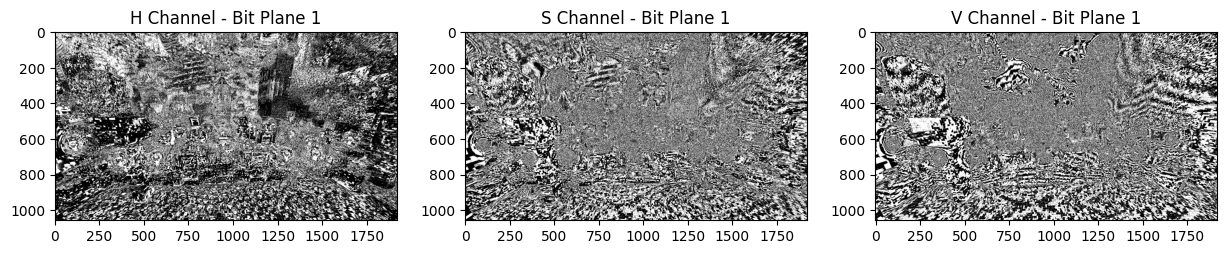

In [45]:
#Giống Matlab
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(bit_plane_H, cmap='gray')
plt.title(f"H Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 2)
plt.imshow(bit_plane_S, cmap='gray')
plt.title(f"S Channel - Bit Plane {BIT_INDEX}")

plt.subplot(1, 3, 3)
plt.imshow(bit_plane_V, cmap='gray')
plt.title(f"V Channel - Bit Plane {BIT_INDEX}")
plt.show()

#### 2.2.5. Display histograms of the RGB channels and the HSV channels

- Kênh RGB

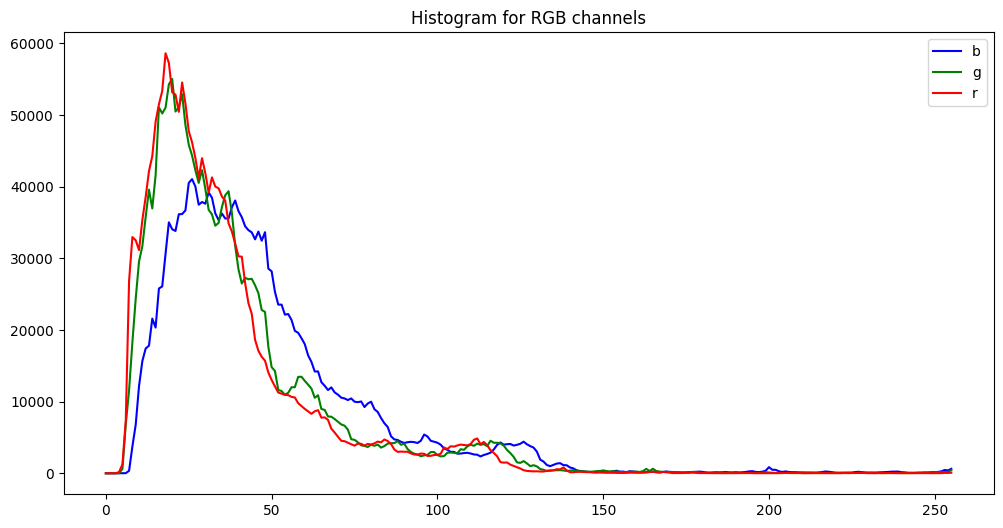

In [46]:
# Đặt màu sắc cho histogram (trùng với màu của rgb)
color = ('b','g','r') 

plt.figure(figsize=(12, 6))
# Vẽ histogram cho các kênh màu RGB
for i, col in enumerate(color):
    #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
    #Dùng newImg_uint8 vì nó đã ở dạng uint8 [0,255] thay vì newImg [0,1]
    histr = cv2.calcHist([newImg_uint8], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.legend(color)
plt.title("Histogram for RGB channels")
plt.show()


- Kênh HSV

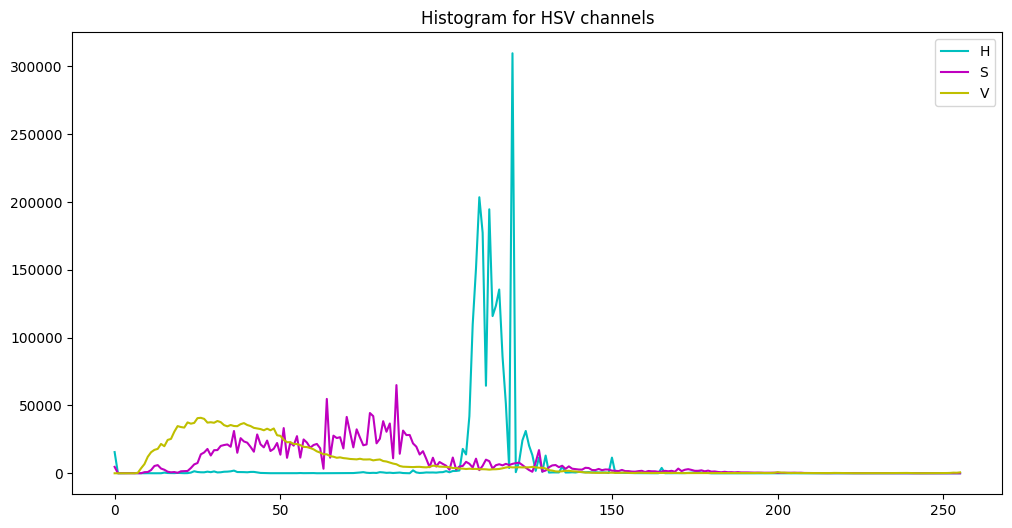

In [47]:
# Đặt màu sắc cho histogram 
color = ('c','m','y')
names = ('H', 'S', 'V')
plt.figure(figsize=(12, 6))
lines = [] 
# Vẽ histogram cho các kênh màu HSV
for i, col in enumerate(color):
    # calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
    # Dùng hsvImg vì nó đã ở dạng uint8 [0,255]
    histr = cv2.calcHist([hsvImg], [i], None, [256], [0, 256])
    line, = plt.plot(histr, color=col)
    lines.append(line)

plt.legend(lines, names)
plt.title("Histogram for HSV channels")
plt.show()

#### 2.2.6. Enhancement using thresholds on the Value channel (V in HSV):

- Choose a low threshold and a high threshold


In [48]:
# Lấy khoảng ngưỡng thấp và cao tầm 20% và 80% brightness
low_threshold = 50 # 50/255 ~ 20% brightness
high_threshold = 200  #200/255 ~ 80% brightness

new_hsvImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2HSV)
# h, s, v 
h, s, v = cv2.split(new_hsvImg)

- For pixels below the low threshold → make them darker

In [49]:
#Chuyển đổi ảnh thành khoảng [0,255]
v_low = v.copy().astype(np.float32)
#Kiểm tra các pixel thấp hơn ngưỡng
pixels_low = v_low < low_threshold
#Giảm độ sáng của các pixel thấp hơn ngưỡng
v_low[pixels_low] = v_low[pixels_low] * 0.5

- For pixels above the high threshold → make them brighter.

In [50]:
#Chuyển đổi ảnh thành khoảng [0,255]
v_high = v.copy().astype(np.float32)
#Kiểm tra các pixel cao hơn ngưỡng
pixels_high = v_high > high_threshold
#Tăng độ sáng của các pixel cao hơn ngưỡng
v_high[pixels_high] = v_high[pixels_high] * 1.5